# Clustering

In [6]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# helper modules
exec(open('helper_functions.py').read())

# load our previously processed well data
unscaled_well_data = pd.read_csv('../data/unscaled_well_data.csv')
scaled_well_data = pd.read_csv('../data/scaled_well_data.csv')

## K-Means Clustering
we will use the scaled well completion dataset from here on
say we want to cluster a section of wells into three type curves instead of one
k-means

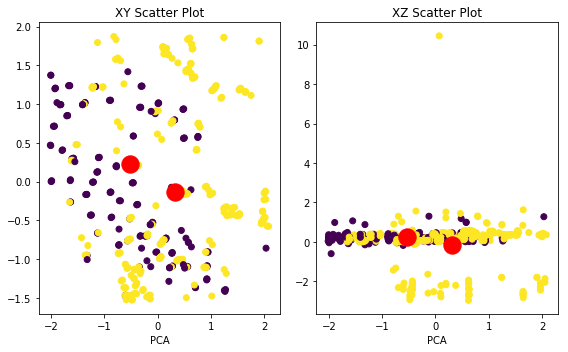

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_well_data)
plot_cluster_results(kmeans_2, scaled_well_data)

#within cluster sum of squared error (i.e. withinness), calinski_harabaz, and silhouette_score 
def print_clustering_scores(df, cluster_res):
    inertia = 'Inertia: ' + cluster_res.inertia_
    print(inertia)
    print('Calinski Harabaz: ' + metrics.calinski_harabaz_score(df, cluster_res.labels_))
    print('Silhouette: ' + metrics.silhouette_score(df, cluster_res.labels_, metric='euclidean'))
    
print_clustering_scores(scaled_well_data, kmeans)

In [ ]:
kmeans_5 = KMeans(n_clusters=3, random_state=0).fit(scaled_well_data)
plot_cluster_results(kmeans_3, scaled_well_data)
#within cluster sum of squared error (i.e. withinness)
kmeans.inertia_
kmeans_elbowplot(X)

In [ ]:
kmeans_3plus = KMeans(n_clusters=3, init='k-means++', max_iter=300, 
                n_init=10, random_state=0).fit(scaled_well_data)
plot_cluster_results(kmeans_3plus, scaled_well_data)
#within cluster sum of squared error (i.e. withinness)
kmeans.inertia_
kmeans_elbowplot(X)

Now we look at another type of clustering to see how the sklearn framework is relatively consistent and convienient for doing unsupervised learning 

In [ ]:
#TODO : Put a good dbscan example in
db = DBSCAN(eps=20, min_samples=10).fit(X)
plot_cluster_results(db, scaled_well_data)


## Hierarchichal Clustering

Now we dive into a different type of clustering, but one that I find really interesting - hierarchical methods. 

In [ ]:
# "ward" minimizes the variance of the clusters being merged.
ward_hclust = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
plot_dendrogram(X, method = 'ward')

In [ ]:
# "average" uses the average of the distances of each observation of the two sets.
avg_hclust = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
plot_dendrogram(X, method = 'average')

In [ ]:
# "complete" or maximum linkage uses the maximum distances between all observations.
comp_hclust = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
plot_dendrogram(X, method = 'complete')